In [1]:
import os
import sys

# Modify the path
sys.path.append("..")

import pandas as pd
import yellowbrick as yb
import matplotlib.pyplot as plt

In [2]:
g = yb.anscombe()

In [3]:
from download import download_all

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
}


def load_data(name, download=True):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files.
    """

    # Get the path from the datasets
    path = datasets[name]

    # Check if the data exists, otherwise download or raise
    if not os.path.exists(path):
        if download:
            download_all()
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))


    # Return the data frame
    return pd.read_csv(path)

In [4]:
# Load the classification data set
data = load_data('credit')

# Specify the features of interest
features = [
        'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
        'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
        'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
        'jul_pay', 'aug_pay', 'sep_pay',
    ]

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.default.as_matrix()


In [6]:
from yellowbrick.features.rankd import Rank2D
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates

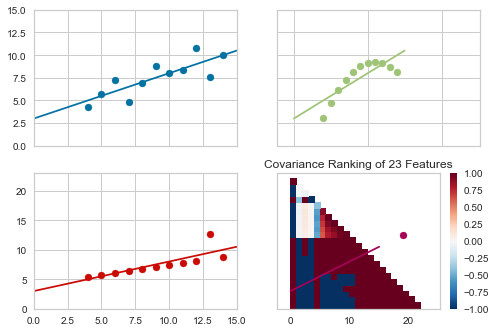

In [7]:
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    # Draw/show/poof the data


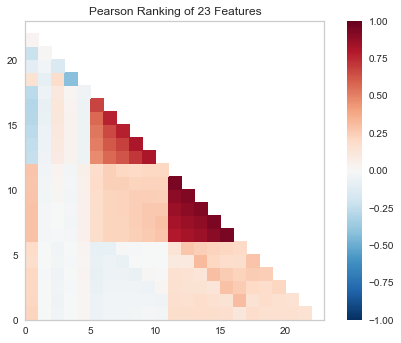

In [8]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

In [9]:
# Load the classification data set
data = load_data('occupancy')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

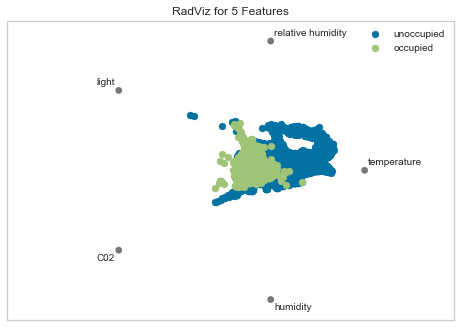

In [10]:
# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

In [22]:
import csv

with open('DatasaurusDozen.tsv','rt') as tsvin, open('new.csv', 'wb') as csvout:
    tsvin = csv.reader(tsvin, delimiter='\t')
    csvout = csv.writer(csvout)

    for row in tsvin:
            csvout.writerows(row)

TypeError: a bytes-like object is required, not 'str'

In [30]:
dinodf =pd.read_csv('DatasaurusDozen.tsv', sep='\t',index_col=False)


In [31]:
dinodf.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333
